In [ ]:
## Bonertz, Brian
## DSC630
## Week 8

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

sales = pd.read_csv('us_retail_sales.csv')
print(sales.shape)
sales.head()

(30, 13)


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [3]:
#unpivot the month columns to create a new dataframe with three columns 
#(Year, Month "varable", and retail sales "value")

salespvt = pd.melt(sales, id_vars='YEAR', 
                        value_vars=['JAN', 'FEB', 'MAR', 'APR',
                                    'MAY', 'JUN', 'JUL', 'AUG',
                                    'SEP', 'OCT', 'NOV', 'DEC'])
salespvt.head()

,YEAR,variable,value
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0


In [5]:
# merge the year and month columns into a new date column

salespvt["Date"] = salespvt["variable"] + ", "+ salespvt["YEAR"].astype(str)

salespvt.head()

,YEAR,variable,value,Date
0,1992,JAN,146925.0,"JAN, 1992"
1,1993,JAN,157555.0,"JAN, 1993"
2,1994,JAN,167518.0,"JAN, 1994"
3,1995,JAN,182413.0,"JAN, 1995"
4,1996,JAN,189135.0,"JAN, 1996"


In [6]:
#Convert the date column into datetime format and sort assending by date

salespvt['date'] = pd.to_datetime(salespvt['Date'])
sales_new = salespvt[['date', 'value']]
sales_sort = sales_new.sort_values(by=['date'])
sales_sort.head()

,date,value
0,1992-01-01,146925.0
30,1992-02-01,147223.0
60,1992-03-01,146805.0
90,1992-04-01,148032.0
120,1992-05-01,149010.0


In [7]:
#when unpivoting the columns, we created 6 rows at the bottom of the dataframe
#that does not have retail sales values

sales_sort.isna().sum()

date     0
value    6
dtype: int64

In [8]:
#Remove the rows containing null values. 

sales_sort.dropna(inplace=True)
sales_sort.isna().sum()

date     0
value    0
dtype: int64

### 1) Plot the data with proper labeling and make some observations on the graph.

Text(0, 0.5, 'Retail Sales')

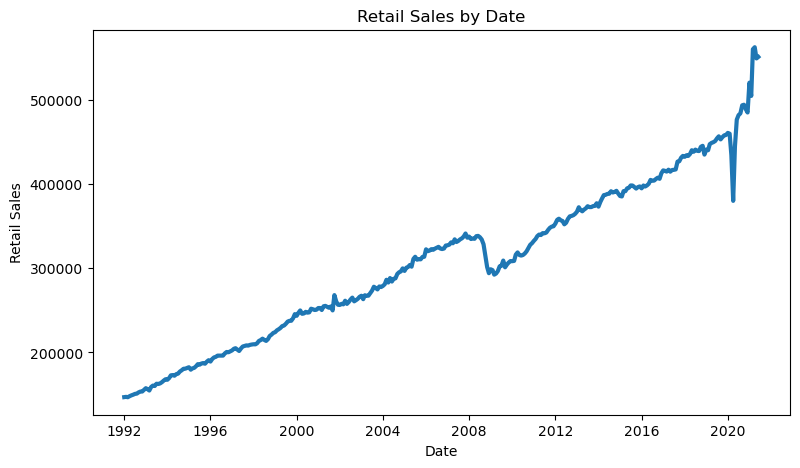

In [9]:
#Plot the dataset with matplotlib

plt.figure(figsize=(9, 5))
plt.plot(sales_sort.date, sales_sort.value, linewidth=3)
plt.title('Retail Sales by Date')
plt.xlabel('Date')
plt.ylabel('Retail Sales')

Observation of the graph above indicates a steady increase in total monthly retail sales over the past 20 years. There are two shifts in this trend. One taking place around 2008 - 2009, and another large drop around 2020. Thinking of economic conditions around these time frames, there was a crash in the housing market around 2008, and the covid pandemic took place around 2020. One may speculate that these are the contributing factors for the drop in retail sales during these two events, however further analysis should be done to examine other economic circumstances within these time frames that may be related. 

Another interesting note is the sharp increase in retail sales that takes place after 2020. This rate of increas has not been witnessed in the previous 20 years, nor was there as large of a rebound in retail sales after the drop in retail saled around 2008. 

### 2) Split this data into train and test set using last year (Jul 2020 - Jun 2021) as test and rest for train

In [10]:
#to split we need to designate the date column as the index to split by date

salesdf = sales_sort.set_index(sales_sort['date'])
salesdf.head()

,date,value
date,,
1992-01-01,1992-01-01,146925.0
1992-02-01,1992-02-01,147223.0
1992-03-01,1992-03-01,146805.0
1992-04-01,1992-04-01,148032.0
1992-05-01,1992-05-01,149010.0


In [13]:
#split the salesdf into train and test dataframes by date of 7/1/2020

train = salesdf[salesdf.index <= '2020-06-01']
test = salesdf[salesdf.index > '2020-06-01']

### 3) Use the training set to build a predictive model for the monthly retail sales. 

In [12]:
#We will use ARIMA to determine the best fit model and parameters 
#from the salesdf dataset 

from pmdarima import auto_arima

import warnings 
warnings.filterwarnings("ignore") 

stepwise_fit = auto_arima(salesdf['value'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # ignore if an order doesn't work 
                          suppress_warnings = True,  # suppress convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=7268.700, Time=0.92 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=7664.770, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=7267.636, Time=0.67 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=7467.236, Time=0.62 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=7806.381, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7392.615, Time=0.17 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=7258.995, Time=1.22 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=7252.210, Time=1.98 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=7251.241, Time=1.09 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=7266.042, Time=0.67 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=7253.090, Time=2.06 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=7257.214, Time=1.42 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=7254.181, Time=2.12 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=7665.601, Time=0.73 sec
 ARIMA(2,0,0)(1,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  354
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 12)   Log Likelihood               -3614.861
Date:                              Thu, 02 May 2024   AIC                           7243.721
Time:                                      16:34:33   BIC                           7270.565
Sample:                                  01-01-1992   HQIC                          7254.415
                                       - 06-01-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1283.9123    464.620      2.763      0.006     373.273    2194.551
ar.L1          0.9306      0.015     61.798      0.000       0.901       0.960
ma.L1         -0.1537      0.035     -4.352      0.000      -0.223      -0.084
ma.L2         -0.1705      0.037     -4.552      0.000      -0.244      -0.097
ar.S.L12      -0.4025      0.016    -25.769      0.000      -0.433      -0.372
ma.S.L12      -0.5413      0.035    -15.358      0.000      -0.610      -0.472
sigma2      8.772e+07      0.003   3.16e+10      0.000    8.77e+07    8.77e+07
===================================================================================
Ljung-Box (L1) (Q):                   5.14   Jarque-Bera (JB):              7005.97
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -1.26
Prob(H) (two-sided):                  0.67   Kurtosis:                        25.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.13e+25. Standard errors may be unstable.
"""

In [13]:
#The best fit model is Sarimax with parameters (1, 0, 2), (1, 1, 1)[12] intercept
#we will load SARIMAX and fit the train data to the model

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['value'],  
                order = (1, 0, 2),  
                seasonal_order =(1, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                  342
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 12)   Log Likelihood               -3446.980
Date:                              Thu, 02 May 2024   AIC                           6905.959
Time:                                      16:41:04   BIC                           6928.754
Sample:                                  01-01-1992   HQIC                          6915.052
                                       - 06-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   9.35e-05   1.07e+04      0.000       1.000       1.000
ma.L1         -0.4013      0.019    -21.311      0.000      -0.438      -0.364
ma.L2         -0.4555      0.021    -22.059      0.000      -0.496      -0.415
ar.S.L12       0.2435      0.025      9.604      0.000       0.194       0.293
ma.S.L12      -0.9970      0.027    -36.390      0.000      -1.051      -0.943
sigma2      4.298e+07   6.98e-10   6.16e+16      0.000     4.3e+07     4.3e+07
===================================================================================
Ljung-Box (L1) (Q):                  25.45   Jarque-Bera (JB):              5091.29
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -3.03
Prob(H) (two-sided):                  0.44   Kurtosis:                        21.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.66e+30. Standard errors may be unstable.
"""

### 4) Use the model to predict the montly retail sales on the last year of data

<Axes: xlabel='date'>

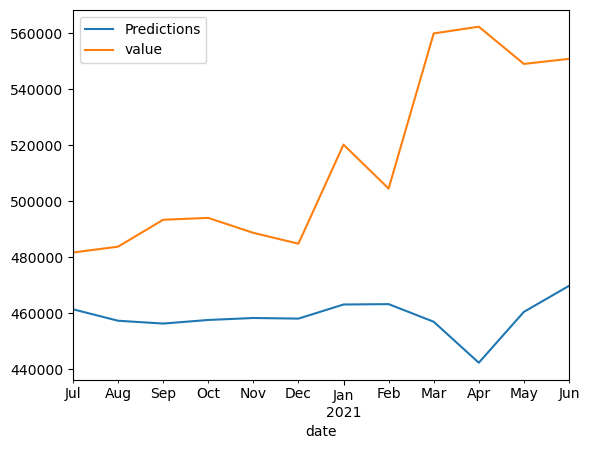

In [15]:
#Then we will code the predictions of the Arima Model against the test set

start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['value'].plot(legend = True)

The predicted values are much lower than the actual values. The train dataset showed constant and steady growth for the first 19 years with one dip around 2008. After the dip in 2008, the retail sales trended a similar steady climb that occurred in years previous. My theory is that the prediction of years prior to 2020 would have a similar growth rate in comparison to the actual events. It seems the model could not have predicted what actually happened in 2021 based off the previous 19 years of data. 

### 5) Report the RMSE of the model preditction on the test set. 

In [16]:
#Evaluate the model using MSE and RMSE

# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
RMSE = rmse(test["value"], predictions) 
print("RMSE Value - ", RMSE)
  
# Calculate mean squared error 
MSE = mean_squared_error(test["value"], predictions) 
print("MSE Value - ", MSE)

RMSE Value -  64443.987862319234
MSE Value -  4153027571.598749


RMSE is a metric used to evaluate how well a model's predicted values align with the actual observed values. It provides a measure of average difference between the predicted and observed values. The larger the RMSE indicates a greater difference between predicted and observed. With the RMSE being so large (64,443), it appears my theory is correct. The data from 1992 to 2020 could not predict what happened in 2021. The large or sharp increase in retail sales in 2021 is an anomaly that has not been observed in the time frame of 1992 to 2020. It appears the model was predicting a similar response to retail sales that took place in 2008, or even a flattening of retail sales after the large drop in retail sales that took place in 2020. 

<Axes: xlabel='date'>

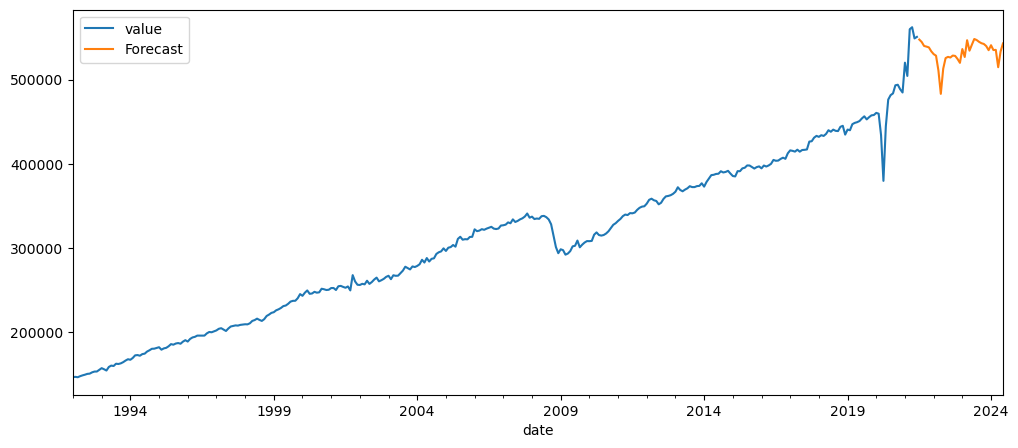

In [19]:
# Train the model on the full dataset 
model = model = SARIMAX(salesdf['value'],  
                        order = (1, 0, 1),  
                        seasonal_order =(1, 1, 1, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(sales_sort),  
                          end = (len(sales_sort)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
salesdf['value'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

I wanted to see how the prediction would play out after 2021. This prediction shows another dip in retail sales 2022 and then a slow rebound for 2023 and 2024. 